# Sparse Representation Classification (block)


In [1]:
import torch
import numpy as np
from matplotlib import pyplot as plt

import dataset
from src_block import src_block_eval

In [2]:
k = 60
name = f"src_block_{k}"

In [3]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

cpu


In [4]:
train_ds = dataset.train()
train_ds = torch.tensor(train_ds, device=device)
train_ds.shape

torch.Size([100, 14, 40, 30])

In [5]:
test_ds = dataset.test()
test_ds = torch.tensor(test_ds, device=device)
test_ds.shape

torch.Size([100, 12, 40, 30])

In [6]:
row_p = [0, 15, 30]
col_p = [0, 10, 26, 40, ]


def split4(x: torch.Tensor):
    res = []
    for j in range(len(col_p) - 1):
        for i in range(len(row_p) - 1):
            m = x[:, :, col_p[j]:col_p[j + 1], row_p[i]:row_p[i + 1]]
            res.append(m.contiguous())
    return res


train_ds = split4(train_ds)
test_ds = split4(test_ds)

In [7]:
accu = src_block_eval(train_ds, test_ds, k=k, reduction=2, device=device)

100%|██████████| 1200/1200 [02:59<00:00,  6.67it/s]


In [8]:
accu.mean()

0.625

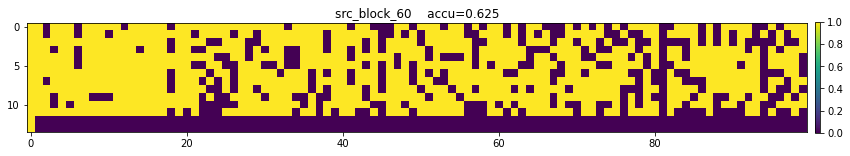

In [9]:
fig = plt.figure(figsize=(12, 2.5))
plt.title(f"{name}    accu={accu.mean()}")
plt.imshow(accu.T)
plt.clim(0, 1)
plt.colorbar(fraction=0.007, pad=0.01)
plt.tight_layout()
plt.show()
fig.savefig(f"res/{name}.png")

In [10]:
accu

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 0, 0],
       [0, 0, 1, ..., 1, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 1, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

In [11]:
np.save(f"res/{name}.npy", accu)